In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web

In [173]:
tickers = ["^VIX", "UVXY", "^GSPC","^DJI", "^IXIC", "^RUT","^TNX", "CL=F", "GC=F","SI=F","EURUSD=X"]

In [174]:
data = pd.DataFrame()

In [175]:
for t in tickers:
    data[t] = web.DataReader(t, data_source="yahoo", start = "2000-1-1")["Adj Close"]

In [176]:
data.dropna(inplace= True)

In [177]:
data.corr()

,^VIX,UVXY,^GSPC,^DJI,^IXIC,^RUT,^TNX,CL=F,GC=F,SI=F,EURUSD=X
^VIX,1.000000,0.316774,0.034683,0.002370,0.144506,-0.188462,-0.487544,-0.243787,0.402907,0.072764,-0.057709
UVXY,0.316774,1.000000,-0.403312,-0.371012,-0.340980,-0.448603,-0.063169,0.301257,0.360969,0.511858,0.333071
^GSPC,0.034683,-0.403312,1.000000,0.989041,0.984479,0.943838,-0.087279,-0.633383,-0.068941,-0.634233,-0.619633
^DJI,0.002370,-0.371012,0.989041,1.000000,0.966233,0.952183,-0.010343,-0.572476,-0.064028,-0.606905,-0.581838
^IXIC,0.144506,-0.340980,0.984479,0.966233,1.000000,0.888283,-0.194551,-0.626279,0.065276,-0.541637,-0.586245
^RUT,-0.188462,-0.448603,0.943838,0.952183,0.888283,1.000000,0.201649,-0.530543,-0.293370,-0.707768,-0.569795
^TNX,-0.487544,-0.063169,-0.087279,-0.010343,-0.194551,0.201649,1.000000,0.355610,-0.654161,-0.279040,0.232110
CL=F,-0.243787,0.301257,-0.633383,-0.572476,-0.626279,-0.530543,0.355610,1.000000,0.241032,0.652608,0.897280
GC=F,0.402907,0.360969,-0.068941,-0.064028,0.065276,-0.293370,-0.654161,0.241032,1.000000,0.752685,0.316446
SI=F,0.072764,0.511858,-0.634233,-0.606905,-0.541637,-0.707768,-0.279040,0.652608,0.752685,1.000000,0.651263


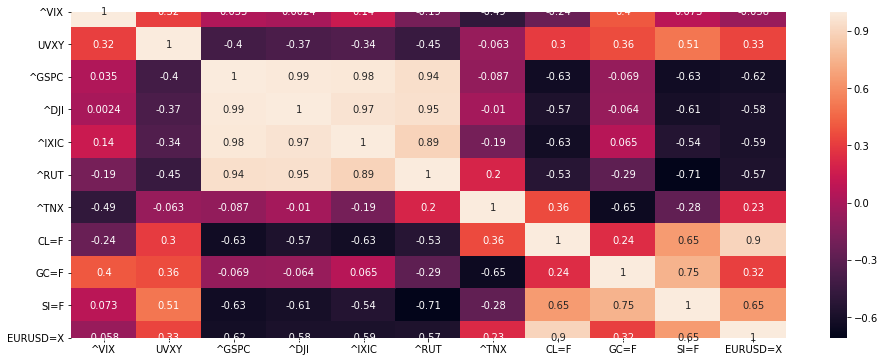

In [178]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(), annot=True)

### Testing how if the Ten year treasury yield can predict the open of vix index
- will need the close of the 20 year treasure yield

In [179]:
tenYear = web.DataReader("^TNX", data_source="yahoo", start = "2000-1-1")["Open"]

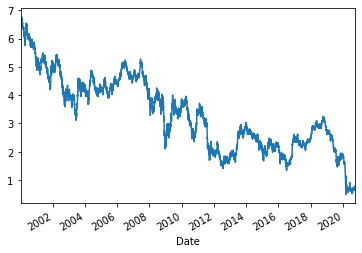

In [180]:
tenYear.plot()

In [181]:
vix = web.DataReader("^VIX", data_source="yahoo", start = "2000-1-1")["Close"]

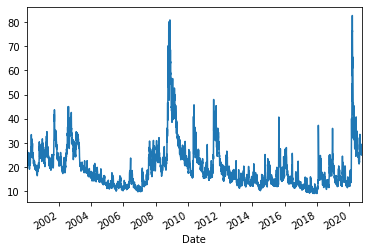

In [182]:
vix.plot()

In [183]:
working_Data = pd.concat([vix, tenYear], axis=1)

In [184]:
working_Data.columns = ["vix", "ten year"]

In [185]:
working_Data.dropna(inplace=True)

### Training Testing Splitting

In [186]:
X = working_Data.drop("vix", axis=1).values
y = working_Data["vix"].values

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [189]:
X_train.shape

(3635, 1)

### Scaling 

In [190]:
from sklearn.preprocessing import MinMaxScaler

In [191]:
scalar = MinMaxScaler()

In [192]:
X_train = scalar.fit_transform(X_train)

In [193]:
X_test = scalar.transform(X_test)

### Early Stopping

In [194]:
from tensorflow.keras.callbacks import EarlyStopping

In [195]:
stop = EarlyStopping("val_loss", mode="min", patience=70)

### Model Creation

In [196]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [197]:
model = Sequential()
model.add(Dense(units= 30, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units= 20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units= 20, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units= 10, activation = "relu"))
model.add(Dense(units= 1))
model.compile(loss = "mse", optimizer = "adam")

In [198]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=700, callbacks=[stop])

Train on 3635 samples, validate on 1558 samples
Epoch 1/700
3635/3635 [==============================] - 2s 579us/sample - loss: 405.5455 - val_loss: 183.7129
Epoch 2/700
3635/3635 [==============================] - 1s 188us/sample - loss: 165.6126 - val_loss: 99.4027
Epoch 3/700
3635/3635 [==============================] - 1s 186us/sample - loss: 144.4481 - val_loss: 105.5677
Epoch 4/700
3635/3635 [==============================] - 1s 186us/sample - loss: 123.2343 - val_loss: 88.1488
Epoch 5/700
3635/3635 [==============================] - 1s 187us/sample - loss: 122.1458 - val_loss: 83.5734
Epoch 6/700
3635/3635 [==============================] - 1s 196us/sample - loss: 114.5366 - val_loss: 86.0124
Epoch 7/700
3635/3635 [==============================] - 1s 204us/sample - loss: 109.5372 - val_loss: 82.7349
Epoch 8/700
3635/3635 [==============================] - 1s 188us/sample - loss: 105.7454 - val_loss: 80.4471
Epoch 9/700
3635/3635 [==============================] - 1s 213us/samp

3635/3635 [==============================] - 1s 184us/sample - loss: 78.0709 - val_loss: 75.0326
Epoch 76/700
3635/3635 [==============================] - 1s 182us/sample - loss: 78.1334 - val_loss: 75.1037
Epoch 77/700
3635/3635 [==============================] - 1s 181us/sample - loss: 78.3538 - val_loss: 74.5280
Epoch 78/700
3635/3635 [==============================] - 1s 181us/sample - loss: 78.1605 - val_loss: 74.7561
Epoch 79/700
3635/3635 [==============================] - 1s 179us/sample - loss: 78.0616 - val_loss: 74.8892
Epoch 80/700
3635/3635 [==============================] - 1s 181us/sample - loss: 78.3792 - val_loss: 75.0810
Epoch 81/700
3635/3635 [==============================] - 1s 183us/sample - loss: 78.1476 - val_loss: 74.3827
Epoch 82/700
3635/3635 [==============================] - 1s 181us/sample - loss: 78.3530 - val_loss: 74.3434
Epoch 83/700
3635/3635 [==============================] - 1s 180us/sample - loss: 77.9263 - val_loss: 74.5255
Epoch 84/700
3635/3635 

3635/3635 [==============================] - 1s 180us/sample - loss: 76.2162 - val_loss: 71.8088
Epoch 150/700
3635/3635 [==============================] - 1s 180us/sample - loss: 76.4263 - val_loss: 71.7829
Epoch 151/700
3635/3635 [==============================] - 1s 186us/sample - loss: 76.7952 - val_loss: 73.2645
Epoch 152/700
3635/3635 [==============================] - 1s 183us/sample - loss: 76.6941 - val_loss: 72.3775
Epoch 153/700
3635/3635 [==============================] - 1s 181us/sample - loss: 76.1543 - val_loss: 71.9573
Epoch 154/700
3635/3635 [==============================] - 1s 181us/sample - loss: 76.5750 - val_loss: 71.6549
Epoch 155/700
3635/3635 [==============================] - 1s 182us/sample - loss: 75.9708 - val_loss: 72.0897
Epoch 156/700
3635/3635 [==============================] - 1s 182us/sample - loss: 76.9213 - val_loss: 72.3675
Epoch 157/700
3635/3635 [==============================] - 1s 180us/sample - loss: 76.8802 - val_loss: 71.9182
Epoch 158/700
3

Epoch 223/700
3635/3635 [==============================] - 1s 193us/sample - loss: 76.4718 - val_loss: 71.5970
Epoch 224/700
3635/3635 [==============================] - 1s 189us/sample - loss: 75.8510 - val_loss: 72.7758
Epoch 225/700
3635/3635 [==============================] - 1s 195us/sample - loss: 76.0596 - val_loss: 71.2875
Epoch 226/700
3635/3635 [==============================] - 1s 193us/sample - loss: 76.0329 - val_loss: 71.4756
Epoch 227/700
3635/3635 [==============================] - 1s 189us/sample - loss: 75.7125 - val_loss: 71.1696
Epoch 228/700
3635/3635 [==============================] - 1s 185us/sample - loss: 76.4795 - val_loss: 72.2358
Epoch 229/700
3635/3635 [==============================] - 1s 184us/sample - loss: 75.9883 - val_loss: 71.2757
Epoch 230/700
3635/3635 [==============================] - 1s 183us/sample - loss: 76.3321 - val_loss: 71.8847
Epoch 231/700
3635/3635 [==============================] - 1s 184us/sample - loss: 76.3022 - val_loss: 72.2857
E

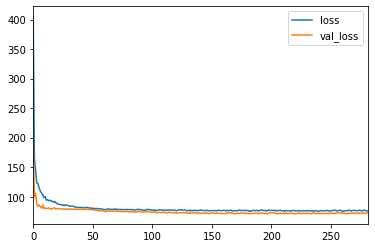

In [199]:
pd.DataFrame(model.history.history).plot()

In [200]:
predictions = model.predict(X_test)

In [201]:
predictions

array([[17.435112],
       [19.329788],
       [17.423355],
       ...,
       [17.438343],
       [19.314781],
       [19.368906]], dtype=float32)

In [202]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score

In [203]:
print(explained_variance_score(y_test,predictions))

0.0933111093231016


In [204]:
print(mean_absolute_error(y_test,predictions))

5.716863638323293


In [205]:
print(mean_squared_error(y_test,predictions))

72.87612807145824


plt.scatter(y_test, predictions)

In [206]:
## Trying on andom data

In [207]:
from random import randint
randomIndex = randint(1,len(working_Data))
randomDay = working_Data.drop("vix", axis=1).iloc[randomIndex]

In [208]:
newDay = randomDay.values.reshape(1,1)

In [209]:
model.predict(newDay)

array([[27.00564]], dtype=float32)

In [210]:
working_Data.iloc[randomIndex]["vix"]

12.029999732971191